In [2]:
import torch
import torch.nn.init
from torch.autograd import Variable
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms
torch.manual_seed(8)
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [3]:
# MNIST dataset download
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [4]:
batch_size = 100
#data 가져오기
data_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

torch.Size([100, 1, 28, 28])
torch.Size([100])


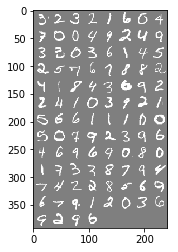

array([3, 2, 3, 2, 1, 6, 0, 4, 7, 0, 0, 4, 9, 2, 4, 9, 3, 3, 0, 3, 6, 1,
       4, 5, 2, 5, 7, 6, 7, 8, 8, 2, 4, 1, 8, 4, 3, 6, 9, 2, 2, 4, 1, 0,
       3, 9, 2, 1, 5, 6, 6, 1, 1, 1, 0, 0, 5, 0, 7, 9, 2, 3, 9, 6, 4, 6,
       9, 6, 9, 0, 8, 0, 1, 7, 3, 3, 8, 7, 9, 4, 7, 4, 2, 2, 8, 5, 6, 9,
       6, 7, 9, 1, 2, 0, 3, 6, 9, 2, 9, 6], dtype=int64)

In [5]:
#Data 보여주기
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
batch_images, batch_labels = next(iter(data_loader))

print(batch_images.size())
print(batch_labels.size())

#숫자 100개 표시
imshow(utils.make_grid(batch_images))

batch_labels.numpy()

In [21]:
#Our Model
linear1 = torch.nn.Linear(784, 256, bias = True)
linear2 = torch.nn.Linear(256, 256, bias = True)
linear3 = torch.nn.Linear(256, 10, bias = True)
batch1 = torch.nn.BatchNorm1d(784)
batch2 = torch.nn.BatchNorm1d(256)
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1,batch1, relu, linear2, batch2, relu, linear3)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=256, out_features=10, bias=True)
)


In [7]:
cost_func = torch.nn.CrossEntropyLoss()
# Softmax 내장

In [19]:
learning_rate = 0.001
training_epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28))
        Y = Variable(batch_labels)
        
        optimizer.zero_grad()
        Y_prediction = model(X)
        cost = cost_func(Y_prediction, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost.data[0]))
    
print("Learning Finished!")

C:\Users\skrtn\Anaconda3\envs\mytorch\lib\site-packages\ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[Epoch:    1] cost = 0.229824215
[Epoch:    2] cost = 0.0788421109
[Epoch:    3] cost = 0.0515770018
[Epoch:    4] cost = 0.039879445
[Epoch:    5] cost = 0.0291006416
Learning Finished!


In [20]:
#model.load_state_dict(torch.load('NN.pkl'))
#model.state_dict()

In [10]:
#정확도 검증
correct = 0
total = 0
for images, labels in mnist_test:
    images  = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


In [11]:
#임의의 Data 넣어서 성능 시험
r = random.randint(0, len(mnist_test)-1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1,28*28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])

Label :  [1]
Prediction :  [1]


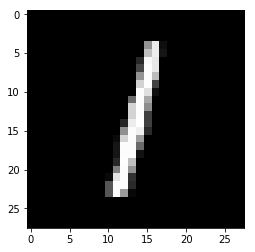

In [12]:
single_prediction = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_prediction.data, 1)[1].numpy())

0


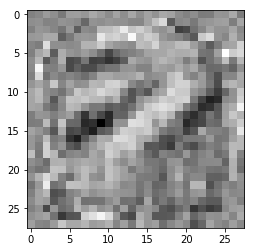

1


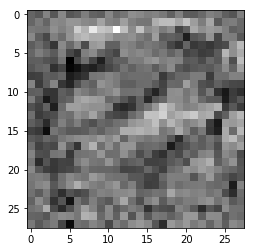

2


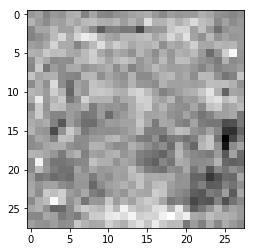

3


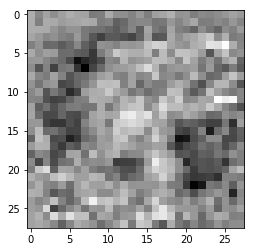

4


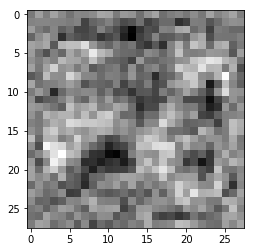

5


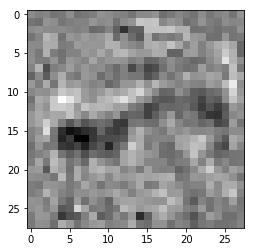

6


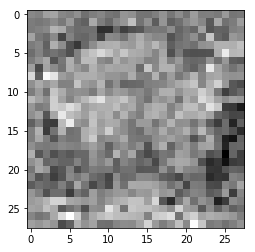

7


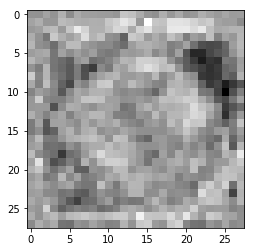

8


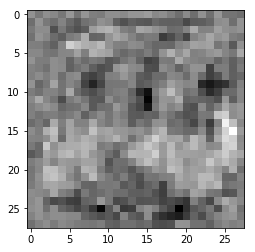

9


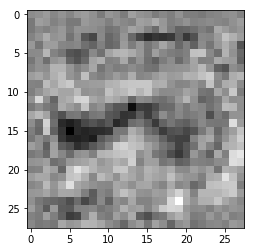

10


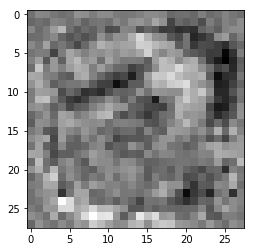

11


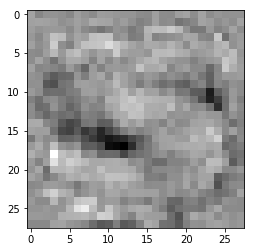

12


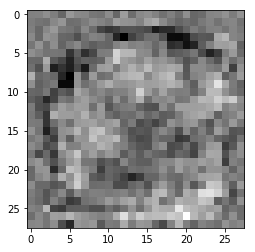

13


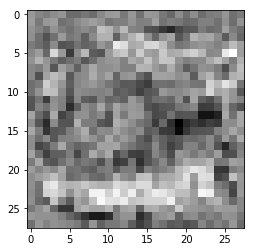

14


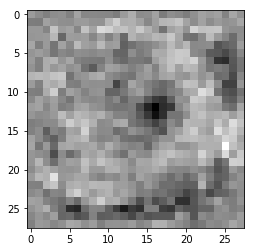

15


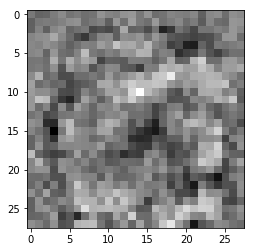

16


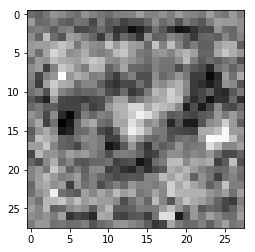

17


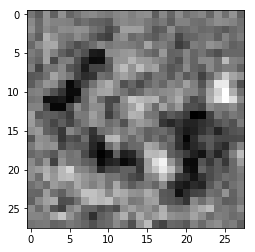

18


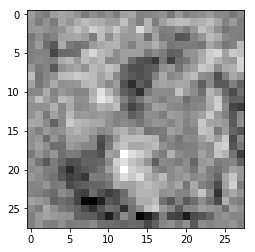

19


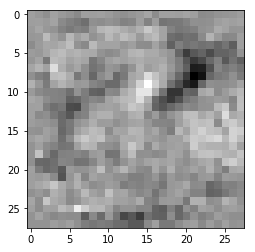

In [13]:
for i in range(20):
    weight = model[0].weight[i, :].data.view(28,28)
    weight = (weight - torch.min(weight))/(torch.max(weight)-torch.min(weight))
    print(i)
    plt.imshow(weight.numpy(), cmap='gray')
    plt.show()